In [714]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [715]:
lovedata = pd.read_csv('Speed Dating Data.csv', encoding='latin-1')

In [716]:
lovedata.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [717]:
lovedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [718]:
n = 0
for i in range(195):
    print(n,': ',lovedata.columns[i])
    n = n+ 1

0 :  iid
1 :  id
2 :  gender
3 :  idg
4 :  condtn
5 :  wave
6 :  round
7 :  position
8 :  positin1
9 :  order
10 :  partner
11 :  pid
12 :  match
13 :  int_corr
14 :  samerace
15 :  age_o
16 :  race_o
17 :  pf_o_att
18 :  pf_o_sin
19 :  pf_o_int
20 :  pf_o_fun
21 :  pf_o_amb
22 :  pf_o_sha
23 :  dec_o
24 :  attr_o
25 :  sinc_o
26 :  intel_o
27 :  fun_o
28 :  amb_o
29 :  shar_o
30 :  like_o
31 :  prob_o
32 :  met_o
33 :  age
34 :  field
35 :  field_cd
36 :  undergra
37 :  mn_sat
38 :  tuition
39 :  race
40 :  imprace
41 :  imprelig
42 :  from
43 :  zipcode
44 :  income
45 :  goal
46 :  date
47 :  go_out
48 :  career
49 :  career_c
50 :  sports
51 :  tvsports
52 :  exercise
53 :  dining
54 :  museums
55 :  art
56 :  hiking
57 :  gaming
58 :  clubbing
59 :  reading
60 :  tv
61 :  theater
62 :  movies
63 :  concerts
64 :  music
65 :  shopping
66 :  yoga
67 :  exphappy
68 :  expnum
69 :  attr1_1
70 :  sinc1_1
71 :  intel1_1
72 :  fun1_1
73 :  amb1_1
74 :  shar1_1
75 :  attr4_1
76 :  sinc4_1

In [719]:
lovedata.dec_o.value_counts()

0    4863
1    3515
Name: dec_o, dtype: int64

In [720]:
# narrowing dataset
match = lovedata.loc[:,['match']]
general = lovedata.loc[:,['iid','gender','match','pid','int_corr','samerace','age','race','match_es','date_3']]
preferences = lovedata.iloc[:,15:23]
notation = lovedata.iloc[:,23:33]
habits = lovedata.iloc[:,46:48]
habits[lovedata.columns[50:67]]=lovedata.iloc[:,50:67]
expectations = lovedata.iloc[:,67]
look_up = lovedata.iloc[:,69:75]
yourself = lovedata.iloc[:,87:92]
partenr = lovedata.iloc[:,97:107]

dlove = pd.concat([general,preferences,expectations,look_up,yourself,partenr], axis=1)
dlove.shape

(8378, 40)

In [721]:
#Second date missing Values
dlove.date_3.fillna(0,inplace=True)
dlove.date_3.value_counts()

0.0    6880
1.0    1498
Name: date_3, dtype: int64

In [722]:
dlove.isnull().sum()

iid            0
gender         0
match          0
pid           10
int_corr     158
samerace       0
age           95
race          63
match_es    1173
date_3         0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
exphappy     101
attr1_1       79
sinc1_1       79
intel1_1      79
fun1_1        89
amb1_1        99
shar1_1      121
attr3_1      105
sinc3_1      105
fun3_1       105
intel3_1     105
amb3_1       105
dec            0
attr         202
sinc         277
intel        296
fun          350
amb          712
shar        1067
like         240
prob         309
met          375
dtype: int64

In [723]:
test_1 = pd.concat([general,look_up],axis=1)
look_up[look_up['shar1_1'].isnull()==True]

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
312,NaN,NaN,NaN,NaN,NaN,NaN
313,NaN,NaN,NaN,NaN,NaN,NaN
314,NaN,NaN,NaN,NaN,NaN,NaN
315,NaN,NaN,NaN,NaN,NaN,NaN
316,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
7845,40.0,10.0,30.0,10.0,10.0,NaN
7846,40.0,10.0,30.0,10.0,10.0,NaN
7847,40.0,10.0,30.0,10.0,10.0,NaN
7848,40.0,10.0,30.0,10.0,10.0,NaN


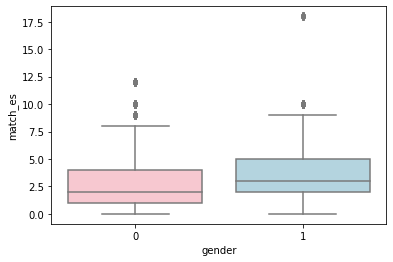

In [724]:
#Number of matches expected
#dlove['match_es']= dlove.match_es.fillna(dlove.match_es.median())
my_pal = {0: "Pink", 1: "Lightblue"}
sns.boxplot(x= dlove.gender, y=dlove.match_es, palette=my_pal)


In [781]:
love = dlove.dropna()
love.shape

(5651, 40)

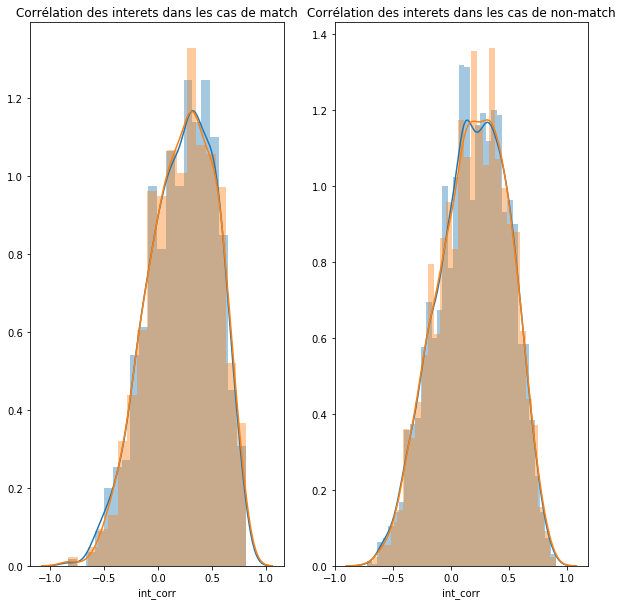

In [790]:
#correlation between participant’s and partner’s ratings of interests in Time 1

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.distplot(lovedata.int_corr[lovedata['match']==1].dropna())
sns.distplot(love.int_corr[lovedata['match']==1].dropna())
plt.title('Corrélation des interets dans les cas de match')
plt.subplot(1,2,2)
sns.distplot(lovedata.int_corr[lovedata['match']==0].dropna())
sns.distplot(love.int_corr[lovedata['match']==0].dropna())
plt.title('Corrélation des interets dans les cas de non-match')
plt.show()

In [728]:
#nombre de matches
love.match.value_counts()

0    4726
1     925
Name: match, dtype: int64

In [740]:
#nombre de participants
love.iid.nunique()

454

In [756]:
#Nombre moyen de Match/non match par participant
love.match.value_counts()/love.iid.nunique()

0    10.409692
1     2.037445
Name: match, dtype: float64

In [748]:
#Nombre moyen de speed date par participant
love.iid.value_counts().mean()

12.447136563876652

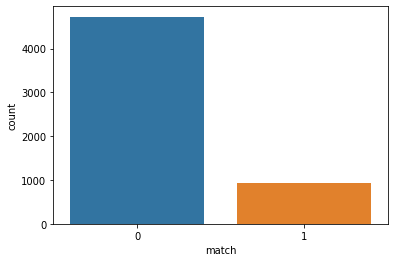

In [742]:
sns.countplot(x=love.match)

In [743]:
#Nombre moyen de 2e date par participant
love.date_3.value_counts()/love.iid.nunique()

0.0    10.306167
1.0     2.140969
Name: date_3, dtype: float64

Participer au speed dating permet en moyenne d'obtenir 2 second date.

In [744]:
#Rule number1: Ne jamais perdre espoir!
chart_leg= love.date_3.groupby(love.match).value_counts()
chart_leg

match  date_3
0      0.0       3994
       1.0        732
1      0.0        685
       1.0        240
Name: date_3, dtype: int64

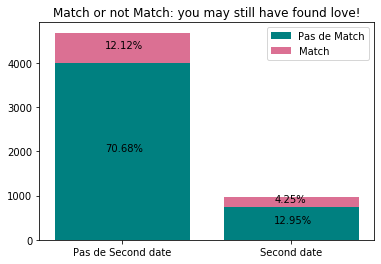

In [745]:
chart_data = love.date_3[love['match']==0].value_counts()
chart_data2 = love.date_3[love['match']==1].value_counts()
plt.bar(['Pas de Second date','Second date'],chart_data, color='teal')
plt.bar(['Pas de Second date','Second date'],chart_data2, bottom = chart_data,color='palevioletred')
plt.legend(['Pas de Match', 'Match'])
plt.text(-0.1,chart_data[0]/2,str('{:.2%}'.format(chart_leg[0][0]/(love.match.value_counts().sum()))))
plt.text(0.9,chart_data[1]/2,str('{:.2%}'.format(chart_leg[0][1]/(love.match.value_counts().sum()))))
plt.text(-0.1,chart_data[0]+(chart_data2[0]/2),str('{:.2%}'.format(chart_leg[1][0]/(love.match.value_counts().sum()))))
plt.text(0.9,chart_data[1]+(chart_data2[1]/2),str('{:.2%}'.format(chart_leg[1][1]/(love.match.value_counts().sum()))))
plt.title('Match or not Match: you may still have found love!')
plt.show()

Ne jamais perdre espoir: il n'est pas absolument nécessaire d'avoir un match pour obtenir un second date!

In [746]:
notation2 = pd.concat([match,general['gender'],notation,partenr],axis=1)
corr_notation2 = notation2.corr() 

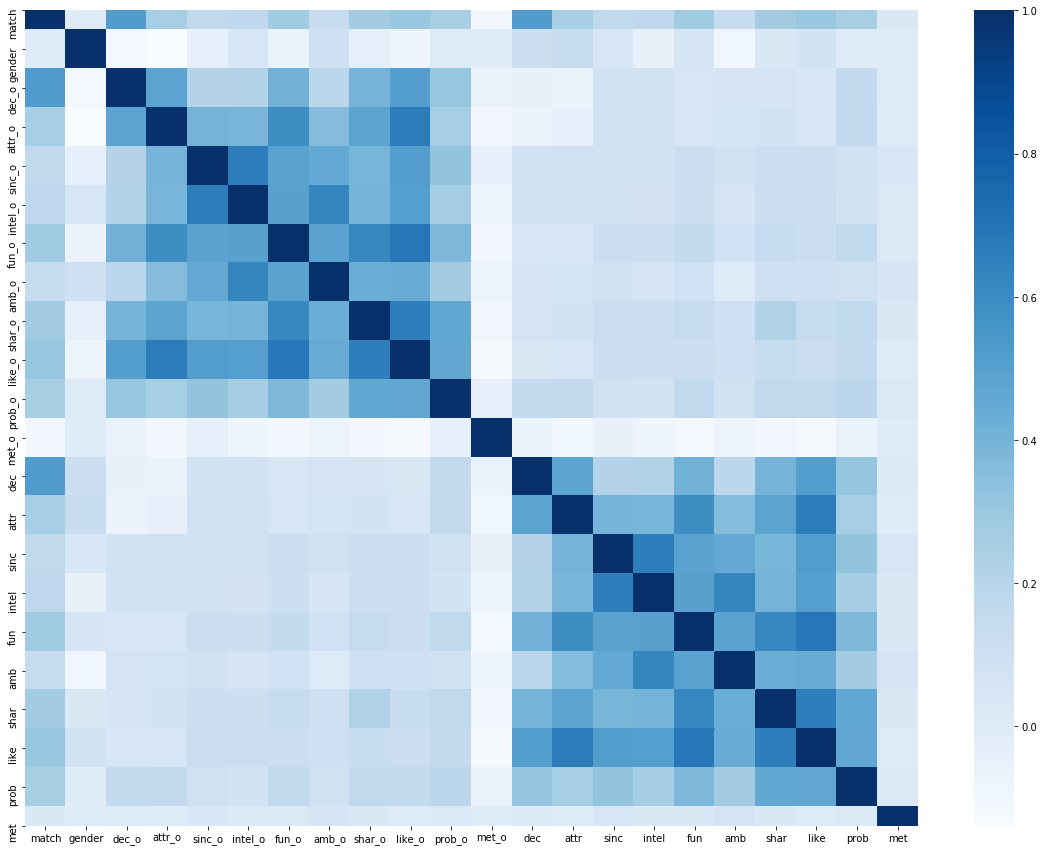

In [747]:
#Y'a t'il une correlation dans les notations respectives des deux partenaires?
plt.subplots(figsize=(20,15))
sns.heatmap(corr_notation2, 
            xticklabels=notation2.columns.values,
            yticklabels=notation2.columns.values,cmap='Blues') 
#--> question: comment faire x, y differents

Il n'y pas de corrélation entre les notations des partenaires et par les partenaires: les impressions des uns et des autres ne sont donc pas réciproques.